In [1]:
import pandas as pd
import math
import numpy as np

In [2]:
#df = pd.read_csv('german_text_data.txt', delimiter=' ')
#C:\Users\griev\Credit score prediction\Test Credit score prediction
df_load = pd.read_csv('C:/Users/griev/Credit score prediction/german.csv')
#df_load.head()

In [3]:
df_load.columns
#duration in month
#credit amount
#

Index(['Duration in month', 'Credit amount',
       'Installment rate in percentage of disposable income',
       'Present residence since', 'Age',
       'Number of existing credits at this bank',
       'Number of people being liable to provide maintenance for',
       'Status of existing checking account', 'Credit history', 'Purpose',
       'Savings account/bonds', 'Present employment since',
       'Other debtors / guarantors', 'Property', 'Other installment plans',
       'Housing', 'Occupation', 'Telephone', 'Foreign worker',
       'Personal status and sex', 'Sex', 'Personal status', 'Outcome',
       'Risk(Outcome_text)'],
      dtype='object')

# Data value change

In [4]:
occupation_mapping = {'skilledEmployee_or_official':'Employed', 
                      'unskilled_resident':'Unemployed',
                      'management_or_selfEmployed_or_highlyQualifiedEmployee':'Employed',
                  'unemployed_unskilled_nonresident':'Unemployed'
                  }
df_load['occupation_new'] = df_load['Occupation'].replace(occupation_mapping)
#df_load.head()

In [5]:
#employemntt length is below

In [6]:
ex_cre_mapping = {0:'zero', 
                      1:'one',
                      2:'two',
                  3:'three',
                  4:'four_and_more'
                  }
df_load['number_of_existing_credits_at_this_bank'] = df_load['Number of existing credits at this bank'].replace(ex_cre_mapping)
#df_load.head()

In [7]:
num_dep_map = {0:'zero',
              1:'one',
              2:'two_and_more'}
df_load['number_of_dependents'] = df_load['Number of people being liable to provide maintenance for'].replace(num_dep_map)

In [8]:
c_a_map = {'no checking account':'None',
          '< 0 DM':'below_zero',
          '0 <= and < 200 DM':'above_zero',
          '>= 200 DM / salary assignments for at least one year ':'above_zero'}
df_load['status_of_existing_checking_account'] = df_load['Status of existing checking account'].replace(c_a_map)

In [9]:
c_H_map = {'existing credits paid back duly till now':'No_missed_payments_of_existing_installements',
          'all credits at this bank paid back duly':'all_credit_paid_in_full',
          'critical account/other credits existing (not at this bank)':'delayed_paying_of_installments',
          'delay in paying off in the past':'delayed_paying_of_installments',
          'no credits taken/all credits paid back duly':'never_taken_a_loan'
          }
df_load['credit_history']=df_load['Credit history'].replace(c_H_map)

In [10]:
df_load['Other installment plans'].value_counts()

none      814
bank      139
stores     47
Name: Other installment plans, dtype: int64

In [11]:
o_i_p_map = {'none':'no',
            'bank':'yes',
            'stores':'yes'}
df_load['other_installment_plans']=df_load['Other installment plans'].replace(o_i_p_map)

In [12]:
h_map={'own':'own',
       'rent':'rent',
       'for_free':'live_in_for_free'
      }
df_load['housing']=df_load['Housing'].replace(h_map)

In [13]:
df_load.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Status of existing checking account,Credit history,Purpose,...,Personal status,Outcome,Risk(Outcome_text),occupation_new,number_of_existing_credits_at_this_bank,number_of_dependents,status_of_existing_checking_account,credit_history,other_installment_plans,housing
0,6,1169,4,4,67,2,1,< 0 DM,critical account/other credits existing (not a...,electronics,...,single,1,Good,Employed,two,one,below_zero,delayed_paying_of_installments,no,own
1,48,5951,2,2,22,1,1,0 <= and < 200 DM,existing credits paid back duly till now,electronics,...,divorced_separated_married,2,Bad,Employed,one,one,above_zero,No_missed_payments_of_existing_installements,no,own
2,12,2096,2,3,49,1,2,no checking account,critical account/other credits existing (not a...,education,...,single,1,Good,Unemployed,one,two_and_more,None,delayed_paying_of_installments,no,own
3,42,7882,2,4,45,1,2,< 0 DM,existing credits paid back duly till now,furniture_equipment,...,single,1,Good,Employed,one,two_and_more,below_zero,No_missed_payments_of_existing_installements,no,live_in_for_free
4,24,4870,3,4,53,2,2,< 0 DM,delay in paying off in the past,car_new,...,single,2,Bad,Employed,two,two_and_more,below_zero,delayed_paying_of_installments,no,live_in_for_free


In [14]:
df_load['disposible_income']=round(((df_load['Credit amount']/df_load['Duration in month'])/df_load['Installment rate in percentage of disposable income'])*100,0)

In [15]:
df_load['disposible_income']

0      4871.0
1      6199.0
2      8733.0
3      9383.0
4      6764.0
        ...  
995    4822.0
996    3214.0
997    1675.0
998    1025.0
999    3390.0
Name: disposible_income, Length: 1000, dtype: float64

In [16]:
##chanage restriction to 60 as maximum.
def derive_duration_group(dur):
    if dur <= 5:
        return "Below_5"
    elif dur > 5 and dur <= 10:
        return "six_10"
    elif dur >10 and dur <= 15:
        return "eleven_15"
    elif dur > 15 and dur <= 20:
        return "sixteen_20"
    elif dur > 20 and dur <= 25:
        return "twenty1_25" 
    elif dur > 25 and dur <= 30:
        return "twenty6_30"
    elif dur >30 and dur <= 35:
        return "thirty1_35"
    elif dur > 35 and dur <= 40:
        return "thirty6_40"
    elif dur > 40 and dur <= 45:
        return "forty1_45"
    elif dur > 45 and dur <= 50:
        return "forty6_50"
    elif dur > 50 and dur <= 55:
        return "fiftyone_55"
    else:
        return "fifty6_60"

##Apply the function to create a new column 'Duration in month Group'
df_load['duration_group'] = df_load['Duration in month'].apply(derive_duration_group)

In [17]:
#Disposible income group
def derive_dispinc_group(dispincome):
    if dispincome <= 2000:
        return "Below_2000"
    elif dispincome >2000 and dispincome <= 4000:
        return "twothouone_4000"
    elif dispincome >4000 and dispincome <= 6000:
        return "fourthouone_6000"
    elif dispincome >6000 and dispincome <= 8000:
        return "sixtythouone_8000"
    elif dispincome >8000 and dispincome <=10000:
        return "eitthouone_10000"
    elif dispincome >10000 and dispincome <=12000:
        return "tenthouone_12000"
    elif dispincome >12000 and dispincome <= 14000:
        return "twelvethouone_14000"
    elif dispincome >14000 and dispincome <= 16000:
        return "forteenthouone_16000"
    elif dispincome >16000 and dispincome <= 18000:
        return "sixteenthouone_18000"
    else:
        return "Above_18001"

df_load['disposible_income_group'] = df_load['disposible_income'].apply(derive_dispinc_group)

In [18]:
emp_len_mapping = {'< 1 year':'less_than_1_year', '1<= and < 4 years':'one_4_years','4<= and < 7 years':'four_7_years',
                  '>=7 years':'More_than_7_years'
                  }
df_load['employment_length'] = df_load['Present employment since'].replace(emp_len_mapping)
#df_load.head()

In [19]:
df_load.value_counts(['Present employment since'])

Present employment since
1<= and < 4 years           339
>=7 years                   253
4<= and < 7 years           174
< 1 year                    172
unemployed                   62
dtype: int64

In [20]:
df_load['employment_length']

0      More_than_7_years
1            one_4_years
2           four_7_years
3           four_7_years
4            one_4_years
             ...        
995         four_7_years
996          one_4_years
997    More_than_7_years
998          one_4_years
999           unemployed
Name: employment_length, Length: 1000, dtype: object

In [21]:
def derive_credit_group(credamt):
    if credamt <= 2000:
        return "Below_2000"
    elif credamt >2000 and credamt <= 4000:
        return "twothouone_4000"
    elif credamt >4000 and credamt <= 6000:
        return "fourthouone_6000"
    elif credamt >6000 and credamt <= 8000:
        return "sixtythouone_8000"
    elif credamt >8000 and credamt <=10000:
        return "eitthouone_10000"
    elif credamt >10000 and credamt <=12000:
        return "tenthouone_12000"
    elif credamt >12000 and credamt <= 14000:
        return "twelvethouone_14000"
    elif credamt >14000 and credamt <= 16000:
        return "forteenthouone_16000"
    elif credamt >16000 and credamt <= 18000:
        return "sixteenthouone_18000"
    else:
        return "Above_18001"

df_load['credit_amount_group'] = df_load['Credit amount'].apply(derive_credit_group)

In [22]:
df_load_new = df_load[['credit_amount_group','duration_group', 'Purpose','disposible_income_group',
                        'number_of_existing_credits_at_this_bank',
                       'number_of_dependents',
                       'status_of_existing_checking_account', 'credit_history',
                       'other_installment_plans'
                      ,   'occupation_new','employment_length', 'housing','Risk(Outcome_text)'
]]

df_load_new

,credit_amount_group,duration_group,Purpose,disposible_income_group,number_of_existing_credits_at_this_bank,number_of_dependents,status_of_existing_checking_account,credit_history,other_installment_plans,occupation_new,employment_length,housing,Risk(Outcome_text)
0,Below_2000,six_10,electronics,fourthouone_6000,two,one,below_zero,delayed_paying_of_installments,no,Employed,More_than_7_years,own,Good
1,fourthouone_6000,forty6_50,electronics,sixtythouone_8000,one,one,above_zero,No_missed_payments_of_existing_installements,no,Employed,one_4_years,own,Bad
2,twothouone_4000,eleven_15,education,eitthouone_10000,one,two_and_more,None,delayed_paying_of_installments,no,Unemployed,four_7_years,own,Good
3,sixtythouone_8000,forty1_45,furniture_equipment,eitthouone_10000,one,two_and_more,below_zero,No_missed_payments_of_existing_installements,no,Employed,four_7_years,live_in_for_free,Good
4,fourthouone_6000,twenty1_25,car_new,sixtythouone_8000,two,two_and_more,below_zero,delayed_paying_of_installments,no,Employed,one_4_years,live_in_for_free,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Below_2000,eleven_15,furniture_equipment,fourthouone_6000,one,one,None,No_missed_payments_of_existing_installements,no,Unemployed,four_7_years,own,Good
996,twothouone_4000,twenty6_30,car_used,twothouone_4000,one,one,below_zero,No_missed_payments_of_existing_installements,no,Employed,one_4_years,own,Good
997,Below_2000,eleven_15,electronics,Below_2000,one,one,None,No_missed_payments_of_existing_installements,no,Employed,More_than_7_years,own,Good
998,Below_2000,forty1_45,electronics,Below_2000,one,one,below_zero,No_missed_payments_of_existing_installements,no,Employed,one_4_years,live_in_for_free,Bad


# Credit Information Bureau of India Limited (CIBIL) Score

In [23]:
#df_discret.head(2)
offset = 600
PDO = 20
Factor = PDO/math.log(2)
#print(Factor)


# number_of_existing_credits_at_this_bank

In [24]:
num_exist_credit_discret = (pd.pivot_table(df_load_new,
                              index ='number_of_existing_credits_at_this_bank', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#credHist_discret['CHBad%'] = credHist_discret['Bad']/credHist_discret['Bad'].sum()
num_exist_credit_discret['necGood%'] = num_exist_credit_discret['Good']/(num_exist_credit_discret['Good']+num_exist_credit_discret['Bad'])
num_exist_credit_discret['necBad%']= 1-num_exist_credit_discret['necGood%']

#calculate WoE
num_exist_credit_discret['necWoE'] = np.log((num_exist_credit_discret['necGood%']) / (num_exist_credit_discret['necBad%']) )

#converting probability to score
num_exist_credit_discret['nec_score'] =round( offset+(Factor*num_exist_credit_discret.necWoE),0)
#credHist_discret

#Merge to the main dataframe
df_discret = pd.merge(df_load_new,num_exist_credit_discret[['number_of_existing_credits_at_this_bank','nec_score']], on='number_of_existing_credits_at_this_bank', how='left')
#df_discret.head(10)

# status_of_existing_checking_account

In [25]:
#create pivote table
seca_discret = (pd.pivot_table(df_load_new,
                              index ='status_of_existing_checking_account', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#credHist_discret['CHBad%'] = credHist_discret['Bad']/credHist_discret['Bad'].sum()
seca_discret['secaGood%'] = seca_discret['Good']/(seca_discret['Good']+seca_discret['Bad'])
seca_discret['secaBad%']= 1-seca_discret['secaGood%']

#calculate WoE
seca_discret['secaWoE'] = np.log((seca_discret['secaGood%']) / (seca_discret['secaBad%']) )

#converting probability to score
seca_discret['seca_score'] =round( offset+(Factor*seca_discret.secaWoE),0)
#credHist_discret

#Merge to the main dataframe
df_discret = pd.merge(df_discret,seca_discret[['status_of_existing_checking_account','seca_score']], on='status_of_existing_checking_account', how='left')
#df_discret.head(10)

#   'other_installment_plans'

In [26]:
#create pivote table
oip_discret = (pd.pivot_table(df_load_new,
                              index ='other_installment_plans', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#credHist_discret['CHBad%'] = credHist_discret['Bad']/credHist_discret['Bad'].sum()
oip_discret['oipGood%'] = oip_discret['Good']/(oip_discret['Good']+oip_discret['Bad'])
oip_discret['oipBad%']= 1-oip_discret['oipGood%']

#calculate WoE
oip_discret['oipWoE'] = np.log((oip_discret['oipGood%']) / (oip_discret['oipBad%']) )

#converting probability to score
oip_discret['oip_score'] =round( offset+(Factor*oip_discret.oipWoE),0)
#credHist_discret

#Merge to the main dataframe
df_discret = pd.merge(df_discret,oip_discret[['other_installment_plans','oip_score']], on='other_installment_plans', how='left')
#df_discret.head(10)

# Credit History

In [27]:
#create pivote table
credHist_discret = (pd.pivot_table(df_load_new,
                              index ='credit_history', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#credHist_discret['CHBad%'] = credHist_discret['Bad']/credHist_discret['Bad'].sum()
credHist_discret['CHGood%'] = credHist_discret['Good']/(credHist_discret['Good']+credHist_discret['Bad'])
credHist_discret['CHBad%']= 1-credHist_discret['CHGood%']

#calculate WoE
credHist_discret['CredHisWoE'] = np.log((credHist_discret['CHGood%']) / (credHist_discret['CHBad%']) )

#converting probability to score
credHist_discret['credhist_score'] =round( offset+(Factor*credHist_discret.CredHisWoE),0)
#credHist_discret

#Merge to the main dataframe
df_discret = pd.merge(df_discret,credHist_discret[['credit_history','credhist_score']], on='credit_history', how='left')
#df_discret.head(10)

# duration_group

In [28]:
#create pivote table
dur_discret = (pd.pivot_table(df_load_new,
                              index ='duration_group', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#purpose_discret['PBad%'] = purpose_discret['Bad']/purpose_discret['Bad'].sum()
dur_discret['DGood%'] = dur_discret['Good']/(dur_discret['Good']+dur_discret['Bad'])
dur_discret['DBad%']=1-dur_discret['DGood%']
#calculate WoE
dur_discret['durWoE'] = np.log((dur_discret['DGood%']) / (dur_discret['DBad%']) )

#converting probability to score
dur_discret['dur_score'] =round( offset+(Factor*dur_discret['durWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,dur_discret[['duration_group','dur_score']], on='duration_group', how='left')
df_discret.head(10)

,credit_amount_group,duration_group,Purpose,disposible_income_group,number_of_existing_credits_at_this_bank,number_of_dependents,status_of_existing_checking_account,credit_history,other_installment_plans,occupation_new,employment_length,housing,Risk(Outcome_text),nec_score,seca_score,oip_score,credhist_score,dur_score
0,Below_2000,six_10,electronics,fourthouone_6000,two,one,below_zero,delayed_paying_of_installments,no,Employed,More_than_7_years,own,Good,628.0,601.0,628.0,639.0,647.0
1,fourthouone_6000,forty6_50,electronics,sixtythouone_8000,one,one,above_zero,No_missed_payments_of_existing_installements,no,Employed,one_4_years,own,Bad,622.0,617.0,628.0,622.0,592.0
2,twothouone_4000,eleven_15,education,eitthouone_10000,one,two_and_more,None,delayed_paying_of_installments,no,Unemployed,four_7_years,own,Good,622.0,658.0,628.0,639.0,634.0
3,sixtythouone_8000,forty1_45,furniture_equipment,eitthouone_10000,one,two_and_more,below_zero,No_missed_payments_of_existing_installements,no,Employed,four_7_years,live_in_for_free,Good,622.0,601.0,628.0,622.0,607.0
4,fourthouone_6000,twenty1_25,car_new,sixtythouone_8000,two,two_and_more,below_zero,delayed_paying_of_installments,no,Employed,one_4_years,live_in_for_free,Bad,628.0,601.0,628.0,639.0,624.0
5,eitthouone_10000,thirty6_40,education,twelvethouone_14000,one,two_and_more,None,No_missed_payments_of_existing_installements,no,Unemployed,one_4_years,live_in_for_free,Good,622.0,658.0,628.0,622.0,607.0
6,twothouone_4000,twenty1_25,furniture_equipment,twothouone_4000,one,one,None,No_missed_payments_of_existing_installements,no,Employed,More_than_7_years,own,Good,622.0,658.0,628.0,622.0,624.0
7,sixtythouone_8000,thirty6_40,car_used,eitthouone_10000,one,one,above_zero,No_missed_payments_of_existing_installements,no,Employed,one_4_years,rent,Good,622.0,617.0,628.0,622.0,607.0
8,twothouone_4000,eleven_15,electronics,twelvethouone_14000,one,one,None,No_missed_payments_of_existing_installements,no,Unemployed,four_7_years,own,Good,622.0,658.0,628.0,622.0,634.0
9,fourthouone_6000,twenty6_30,car_new,fourthouone_6000,two,one,above_zero,delayed_paying_of_installments,no,Employed,unemployed,own,Bad,628.0,617.0,628.0,639.0,620.0


# disposible_income_group

In [29]:
#create pivote table
disinc_discret = (pd.pivot_table(df_load_new,
                              index ='disposible_income_group', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#purpose_discret['PBad%'] = purpose_discret['Bad']/purpose_discret['Bad'].sum()
disinc_discret['DIGood%'] = disinc_discret['Good']/(disinc_discret['Good']+disinc_discret['Bad'])
disinc_discret['DIBad%']=1-disinc_discret['DIGood%']
#calculate WoE
disinc_discret['disincWoE'] = np.log((disinc_discret['DIGood%']) / (disinc_discret['DIBad%']) )

#converting probability to score
disinc_discret['disinc_score'] =round( offset+(Factor*disinc_discret['disincWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,disinc_discret[['disposible_income_group','disinc_score']], on='disposible_income_group', how='left')
#df_discret.head(10)

In [30]:
df_discret

,credit_amount_group,duration_group,Purpose,disposible_income_group,number_of_existing_credits_at_this_bank,number_of_dependents,status_of_existing_checking_account,credit_history,other_installment_plans,occupation_new,employment_length,housing,Risk(Outcome_text),nec_score,seca_score,oip_score,credhist_score,dur_score,disinc_score
0,Below_2000,six_10,electronics,fourthouone_6000,two,one,below_zero,delayed_paying_of_installments,no,Employed,More_than_7_years,own,Good,628.0,601.0,628.0,639.0,647.0,625.0
1,fourthouone_6000,forty6_50,electronics,sixtythouone_8000,one,one,above_zero,No_missed_payments_of_existing_installements,no,Employed,one_4_years,own,Bad,622.0,617.0,628.0,622.0,592.0,635.0
2,twothouone_4000,eleven_15,education,eitthouone_10000,one,two_and_more,None,delayed_paying_of_installments,no,Unemployed,four_7_years,own,Good,622.0,658.0,628.0,639.0,634.0,623.0
3,sixtythouone_8000,forty1_45,furniture_equipment,eitthouone_10000,one,two_and_more,below_zero,No_missed_payments_of_existing_installements,no,Employed,four_7_years,live_in_for_free,Good,622.0,601.0,628.0,622.0,607.0,623.0
4,fourthouone_6000,twenty1_25,car_new,sixtythouone_8000,two,two_and_more,below_zero,delayed_paying_of_installments,no,Employed,one_4_years,live_in_for_free,Bad,628.0,601.0,628.0,639.0,624.0,635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Below_2000,eleven_15,furniture_equipment,fourthouone_6000,one,one,None,No_missed_payments_of_existing_installements,no,Unemployed,four_7_years,own,Good,622.0,658.0,628.0,622.0,634.0,625.0
996,twothouone_4000,twenty6_30,car_used,twothouone_4000,one,one,below_zero,No_missed_payments_of_existing_installements,no,Employed,one_4_years,own,Good,622.0,601.0,628.0,622.0,620.0,627.0
997,Below_2000,eleven_15,electronics,Below_2000,one,one,None,No_missed_payments_of_existing_installements,no,Employed,More_than_7_years,own,Good,622.0,658.0,628.0,622.0,634.0,608.0
998,Below_2000,forty1_45,electronics,Below_2000,one,one,below_zero,No_missed_payments_of_existing_installements,no,Employed,one_4_years,live_in_for_free,Bad,622.0,601.0,628.0,622.0,607.0,608.0


# Purpose

In [31]:
#create pivote table
purpose_discret = (pd.pivot_table(df_load_new,
                              index ='Purpose', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#purpose_discret['PBad%'] = purpose_discret['Bad']/purpose_discret['Bad'].sum()
purpose_discret['PGood%'] = purpose_discret['Good']/(purpose_discret['Good']+purpose_discret['Bad'])
purpose_discret['PBad%']=1-purpose_discret['PGood%']
#calculate WoE
purpose_discret['PurposeWoE'] = np.log((purpose_discret['PGood%']) / (purpose_discret['PBad%']) )

#converting probability to score
purpose_discret['purpose_score'] =round( offset+(Factor*purpose_discret['PurposeWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,purpose_discret[['Purpose','purpose_score']], on='Purpose', how='left')
#df_discret.head(10)

In [32]:
purpose_discret
#nominal

Risk(Outcome_text),Purpose,Bad,Good,PGood%,PBad%,PurposeWoE,purpose_score
0,business,34,63,0.649485,0.350515,0.616774,618.0
1,car_new,89,145,0.619658,0.380342,0.488097,614.0
2,car_used,17,86,0.834951,0.165049,1.621134,647.0
3,domestic_appliances,4,8,0.666667,0.333333,0.693147,620.0
4,education,22,28,0.560000,0.440000,0.241162,607.0
5,electronics,62,218,0.778571,0.221429,1.257361,636.0
6,furniture_equipment,58,123,0.679558,0.320442,0.751741,622.0
7,others,5,7,0.583333,0.416667,0.336472,610.0
8,repairs,8,14,0.636364,0.363636,0.559616,616.0
9,retraining,1,8,0.888889,0.111111,2.079442,660.0


# 'Occupation',

In [33]:
#nominal
#create pivot table
occu_discret = (pd.pivot_table(df_load_new,
                              index ='occupation_new', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#occu_discret['occuBad%'] = occu_discret['Bad']/occu_discret ['Bad'].sum()
occu_discret ['occuGood%'] = occu_discret ['Good']/(occu_discret ['Good']+occu_discret ['Bad'])
occu_discret['occuBad%'] = 1-occu_discret ['occuGood%']

#calculate WoE
occu_discret ['OccupationWoE'] = np.log((occu_discret ['occuGood%']) / (occu_discret ['occuBad%']) )


#converting probability to score
occu_discret ['Occupation_score']  =round( offset+(Factor*occu_discret ['OccupationWoE'] ),0)


#Merge to the main dataframe
df_discret = pd.merge(df_discret,occu_discret [['occupation_new','Occupation_score']], 
                      on='occupation_new', how='left')
#occu_discret

In [34]:
df_discret.head()

,credit_amount_group,duration_group,Purpose,disposible_income_group,number_of_existing_credits_at_this_bank,number_of_dependents,status_of_existing_checking_account,credit_history,other_installment_plans,occupation_new,...,housing,Risk(Outcome_text),nec_score,seca_score,oip_score,credhist_score,dur_score,disinc_score,purpose_score,Occupation_score
0,Below_2000,six_10,electronics,fourthouone_6000,two,one,below_zero,delayed_paying_of_installments,no,Employed,...,own,Good,628.0,601.0,628.0,639.0,647.0,625.0,636.0,624.0
1,fourthouone_6000,forty6_50,electronics,sixtythouone_8000,one,one,above_zero,No_missed_payments_of_existing_installements,no,Employed,...,own,Bad,622.0,617.0,628.0,622.0,592.0,635.0,636.0,624.0
2,twothouone_4000,eleven_15,education,eitthouone_10000,one,two_and_more,None,delayed_paying_of_installments,no,Unemployed,...,own,Good,622.0,658.0,628.0,639.0,634.0,623.0,607.0,627.0
3,sixtythouone_8000,forty1_45,furniture_equipment,eitthouone_10000,one,two_and_more,below_zero,No_missed_payments_of_existing_installements,no,Employed,...,live_in_for_free,Good,622.0,601.0,628.0,622.0,607.0,623.0,622.0,624.0
4,fourthouone_6000,twenty1_25,car_new,sixtythouone_8000,two,two_and_more,below_zero,delayed_paying_of_installments,no,Employed,...,live_in_for_free,Bad,628.0,601.0,628.0,639.0,624.0,635.0,614.0,624.0


# 'Length of employment'

In [35]:
 
#create pivote table
PE_discret = (pd.pivot_table(df_load_new,
                              index ='employment_length', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#PE_discret ['PEBad%'] = PE_discret ['Bad']/PE_discret ['Bad'].sum()
PE_discret ['PEGood%'] = PE_discret ['Good']/(PE_discret ['Good']+PE_discret ['Bad'])
PE_discret ['PEBad%']=1-PE_discret ['PEGood%']
#calculate WoE
PE_discret ['PresentEmployemntSinceWoE'] = np.log((PE_discret ['PEGood%']) / (PE_discret ['PEBad%']) )

#converting probability to score
PE_discret ['PresentEmployemntSince_score'] =round( offset+(Factor*PE_discret ['PresentEmployemntSinceWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,PE_discret [['employment_length','PresentEmployemntSince_score']], on='employment_length', how='left')

In [36]:
 PE_discret

Risk(Outcome_text),employment_length,Bad,Good,PEGood%,PEBad%,PresentEmployemntSinceWoE,PresentEmployemntSince_score
0,More_than_7_years,64,189,0.747036,0.252964,1.082864,631.0
1,four_7_years,39,135,0.775862,0.224138,1.241713,636.0
2,less_than_1_year,70,102,0.593023,0.406977,0.376478,611.0
3,one_4_years,104,235,0.693215,0.306785,0.815195,624.0
4,unemployed,23,39,0.629032,0.370968,0.528067,615.0


# Credit amount

In [37]:

#create pivote table
CA_discret = (pd.pivot_table(df_load_new,
                              index ='credit_amount_group', columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#CA_discret ['caBad%'] = CA_discret ['Bad']/CA_discret ['Bad'].sum()
CA_discret ['caGood%'] = CA_discret ['Good']/(CA_discret ['Good']+CA_discret ['Bad'])
CA_discret ['caBad%'] = 1-CA_discret ['caGood%']
#calculate WoE
CA_discret ['CreditAmtWoE'] = np.log((CA_discret ['caGood%']) / (CA_discret ['caBad%']) )

#converting probability to score
CA_discret ['CreditAmt_score'] =round( offset+(Factor*CA_discret ['CreditAmtWoE']),0)

#Merge to the main dataframe
df_discret = pd.merge(df_discret,CA_discret [['credit_amount_group','CreditAmt_score']], on='credit_amount_group', how='left')
#df_discret.head(10)

In [38]:
#CA_discret
#ordinal

#  'Housing'
       

In [39]:
#nominal
#create pivot table
hs_discret = (pd.pivot_table(df_load_new,
                              index ='housing', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#hs_discret['hsBad%'] = hs_discret['Bad']/hs_discret ['Bad'].sum()
hs_discret ['hsGood%'] = hs_discret ['Good']/(hs_discret ['Good']+hs_discret ['Bad'])
hs_discret['hsBad%']=1-hs_discret ['hsGood%']

#calculate WoE
hs_discret ['HousingWoE'] = np.log((hs_discret ['hsGood%']) / (hs_discret ['hsBad%']) )


#converting probability to score
hs_discret ['Housing_score']  =round( offset+(Factor*hs_discret ['HousingWoE'] ),0)


#Merge to the main dataframe
df_discret = pd.merge(df_discret,hs_discret [['housing','Housing_score']], 
                      on='housing', how='left')
hs_discret

Risk(Outcome_text),housing,Bad,Good,hsGood%,hsBad%,HousingWoE,Housing_score
0,live_in_for_free,44,64,0.592593,0.407407,0.374693,611.0
1,own,186,527,0.739130,0.260870,1.041454,630.0
2,rent,70,109,0.608939,0.391061,0.442853,613.0


# 'Number of dependence', 

In [40]:
#create pivot table
depend_discret = (pd.pivot_table(df_load_new,
                              index ='number_of_dependents', 
                            columns ='Risk(Outcome_text)', aggfunc = 'size')).reset_index()
#Create rate of good and Bad
#depend_discret['dependBad%'] = depend_discret['Bad']/depend_discret ['Bad'].sum()
depend_discret ['dependGood%'] = depend_discret ['Good']/(depend_discret ['Good']+depend_discret ['Bad'])
depend_discret['dependBad%']= 1 - depend_discret ['dependGood%']

#calculate WoE
depend_discret ['DependentsWoE'] = np.log((depend_discret ['dependGood%']) / (depend_discret ['dependBad%']) )


#converting probability to score
depend_discret ['Dependents_score']  =round( offset+(Factor*depend_discret ['DependentsWoE'] ),0)



#Merge to the main dataframe
df_discret = pd.merge(df_discret,depend_discret [['number_of_dependents','Dependents_score']], 
                      on='number_of_dependents', how='left')

In [41]:
df_discret.iloc[:,-12:]

,nec_score,seca_score,oip_score,credhist_score,dur_score,disinc_score,purpose_score,Occupation_score,PresentEmployemntSince_score,CreditAmt_score,Housing_score,Dependents_score
0,628.0,601.0,628.0,639.0,647.0,625.0,636.0,624.0,631.0,627.0,630.0,624.0
1,622.0,617.0,628.0,622.0,592.0,635.0,636.0,624.0,624.0,614.0,630.0,624.0
2,622.0,658.0,628.0,639.0,634.0,623.0,607.0,627.0,636.0,635.0,630.0,625.0
3,622.0,601.0,628.0,622.0,607.0,623.0,622.0,624.0,636.0,614.0,611.0,625.0
4,628.0,601.0,628.0,639.0,624.0,635.0,614.0,624.0,624.0,614.0,611.0,625.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,622.0,658.0,628.0,622.0,634.0,625.0,622.0,627.0,636.0,627.0,630.0,624.0
996,622.0,601.0,628.0,622.0,620.0,627.0,647.0,624.0,624.0,635.0,630.0,624.0
997,622.0,658.0,628.0,622.0,634.0,608.0,636.0,624.0,631.0,627.0,630.0,624.0
998,622.0,601.0,628.0,622.0,607.0,608.0,636.0,624.0,624.0,627.0,611.0,624.0


In [42]:
df_discret.columns

Index(['credit_amount_group', 'duration_group', 'Purpose',
       'disposible_income_group', 'number_of_existing_credits_at_this_bank',
       'number_of_dependents', 'status_of_existing_checking_account',
       'credit_history', 'other_installment_plans', 'occupation_new',
       'employment_length', 'housing', 'Risk(Outcome_text)', 'nec_score',
       'seca_score', 'oip_score', 'credhist_score', 'dur_score',
       'disinc_score', 'purpose_score', 'Occupation_score',
       'PresentEmployemntSince_score', 'CreditAmt_score', 'Housing_score',
       'Dependents_score'],
      dtype='object')

In [43]:
df_discret['averagescore'] = round(df_discret.iloc[:,-12:].mean(axis=1) ,0)
df_discret.head()

,credit_amount_group,duration_group,Purpose,disposible_income_group,number_of_existing_credits_at_this_bank,number_of_dependents,status_of_existing_checking_account,credit_history,other_installment_plans,occupation_new,...,credhist_score,dur_score,disinc_score,purpose_score,Occupation_score,PresentEmployemntSince_score,CreditAmt_score,Housing_score,Dependents_score,averagescore
0,Below_2000,six_10,electronics,fourthouone_6000,two,one,below_zero,delayed_paying_of_installments,no,Employed,...,639.0,647.0,625.0,636.0,624.0,631.0,627.0,630.0,624.0,628.0
1,fourthouone_6000,forty6_50,electronics,sixtythouone_8000,one,one,above_zero,No_missed_payments_of_existing_installements,no,Employed,...,622.0,592.0,635.0,636.0,624.0,624.0,614.0,630.0,624.0,622.0
2,twothouone_4000,eleven_15,education,eitthouone_10000,one,two_and_more,None,delayed_paying_of_installments,no,Unemployed,...,639.0,634.0,623.0,607.0,627.0,636.0,635.0,630.0,625.0,630.0
3,sixtythouone_8000,forty1_45,furniture_equipment,eitthouone_10000,one,two_and_more,below_zero,No_missed_payments_of_existing_installements,no,Employed,...,622.0,607.0,623.0,622.0,624.0,636.0,614.0,611.0,625.0,620.0
4,fourthouone_6000,twenty1_25,car_new,sixtythouone_8000,two,two_and_more,below_zero,delayed_paying_of_installments,no,Employed,...,639.0,624.0,635.0,614.0,624.0,624.0,614.0,611.0,625.0,622.0


In [44]:
data = df_discret.copy()
data.head()


,credit_amount_group,duration_group,Purpose,disposible_income_group,number_of_existing_credits_at_this_bank,number_of_dependents,status_of_existing_checking_account,credit_history,other_installment_plans,occupation_new,...,credhist_score,dur_score,disinc_score,purpose_score,Occupation_score,PresentEmployemntSince_score,CreditAmt_score,Housing_score,Dependents_score,averagescore
0,Below_2000,six_10,electronics,fourthouone_6000,two,one,below_zero,delayed_paying_of_installments,no,Employed,...,639.0,647.0,625.0,636.0,624.0,631.0,627.0,630.0,624.0,628.0
1,fourthouone_6000,forty6_50,electronics,sixtythouone_8000,one,one,above_zero,No_missed_payments_of_existing_installements,no,Employed,...,622.0,592.0,635.0,636.0,624.0,624.0,614.0,630.0,624.0,622.0
2,twothouone_4000,eleven_15,education,eitthouone_10000,one,two_and_more,None,delayed_paying_of_installments,no,Unemployed,...,639.0,634.0,623.0,607.0,627.0,636.0,635.0,630.0,625.0,630.0
3,sixtythouone_8000,forty1_45,furniture_equipment,eitthouone_10000,one,two_and_more,below_zero,No_missed_payments_of_existing_installements,no,Employed,...,622.0,607.0,623.0,622.0,624.0,636.0,614.0,611.0,625.0,620.0
4,fourthouone_6000,twenty1_25,car_new,sixtythouone_8000,two,two_and_more,below_zero,delayed_paying_of_installments,no,Employed,...,639.0,624.0,635.0,614.0,624.0,624.0,614.0,611.0,625.0,622.0


# Handling categorical data

# One hot encding

In [45]:
purpose = data['Purpose']
ohe_purpose=pd.get_dummies(purpose)#,drop_first=True)
ohe_purpose.head()
#test_data.drop(["Duration"], axis = 1, inplace = True)
#business droped

,business,car_new,car_used,domestic_appliances,education,electronics,furniture_equipment,others,repairs,retraining
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [46]:
data['other_installment_plans'].value_counts()

no     814
yes    186
Name: other_installment_plans, dtype: int64

In [47]:
other_installment_plans= data['other_installment_plans']
ohe_other_installment_plans = pd.get_dummies(other_installment_plans)

In [48]:
occupation = data['occupation_new']
ohe_occupation = pd.get_dummies(occupation)

In [49]:
#df_discret['Purpose'].value_counts()
#df_discret['Occupation'].value_counts()
#df_load['Employment_length'].value_counts()
# df_discret['Credit_amount_group'].value_counts() #Do not use
#df_discret['Other_debtors_or_guarantors'].value_counts()
#df_discret['Housing'].value_counts()
#df_discret['Residence_length'].value_counts()
#df_discret['Age_group'].value_counts()
#df_discret['Sex'].value_counts() # do not use
#df_discret['Personal_status'].value_counts()# do not use 
#df_discret['Number_of_dependents'].value_counts()

# Label encoding for ordinal data

# Employment length

In [50]:
emp_len = data['employment_length']
emp_len.replace({'unemployed':1,'less_than_1_year':2, 'one_4_years':3,'four_7_years':4, 
                 'More_than_7_years':5},inplace=True)

In [51]:
data['employment_length'].value_counts()

3    339
5    253
4    174
2    172
1     62
Name: employment_length, dtype: int64

# number_of_existing_credits_at_this_bank

In [52]:
numb_of_existing_credit =data['number_of_existing_credits_at_this_bank']
numb_of_existing_credit.replace({
                     'zero':1, 
                      'one':2,
                      'two':3,
                  'three':4,
                  'four_and_more':5
    
}, inplace=True)


# status_of_existing_checking_account

In [53]:
data['status_of_existing_checking_account'].value_counts()

None          394
above_zero    332
below_zero    274
Name: status_of_existing_checking_account, dtype: int64

In [54]:
status_of_existing_checking_account = data['status_of_existing_checking_account']
status_of_existing_checking_account.replace({
    'None':1,
    'below_zero':2,
    'above_zero':3   
}, inplace=True)

# Duration in month

In [55]:
data['number_of_existing_credits_at_this_bank'].value_counts()

2    632
3    333
4     28
5      6
1      1
Name: number_of_existing_credits_at_this_bank, dtype: int64

In [56]:
Duration=data['duration_group']
Duration.replace({
            'Below_5' : 12 ,
            'six_10' :11,
            'eleven_15' :10     ,
            'sixteen_20' : 9     ,
'twenty1_25' : 8,
'twenty6_30' : 7,
'thirty1_35' : 6,
'thirty6_40' : 5,
'forty1_45' : 4,
'forty6_50' : 3,
'fiftyone_55' : 2,
'fifty6_60' : 1
   
                                    }, inplace=True)




# Credit Amount

In [57]:
#data['credit_amount_group'].value_counts()

In [58]:
creditamount = data['credit_amount_group']
creditamount.replace({
    'Below_2000' : 10,
    'twothouone_4000': 9,
    'fourthouone_6000':8,
    'sixtythouone_8000':7,
    'eitthouone_10000':6,
    'tenthouone_12000':5, 
    'twelvethouone_14000':4,
    'forteenthouone_16000':3,
    'sixteenthouone_18000':2,
    'Above_18001':1
}, inplace=True

)

# Disposible income

In [59]:
#data['credit_history'].value_counts()

In [60]:
disposibleincome = data['disposible_income_group']
disposibleincome.replace({
       'Below_2000' : 1,
    'twothouone_4000': 2,
    'fourthouone_6000':3,
    'sixtythouone_8000':4,
    'eitthouone_10000':5,
    'tenthouone_12000':6, 
    'twelvethouone_14000':7,
    'forteenthouone_16000':8,
    'sixteenthouone_18000':9,
    'Above_18001':10
    
}, inplace=True

)

# dependents

In [61]:
dependents=data['number_of_dependents']
dependents.replace({'zero':3,'one':2,'two_and_more':1}, inplace=True)

# Housing

In [62]:
#data['housing'].value_counts()
housing= data['housing']
housing.replace({
    'own':  3    ,
    'rent':2,
    'live_in_for_free':1 
},inplace=True)

# credit history

In [63]:
#data['credit_history'].value_counts()
credithistory = data['credit_history']
credithistory.replace({
'No_missed_payments_of_existing_installements': 2   ,
'delayed_paying_of_installments':1                  ,
'all_credit_paid_in_full':3                         ,
'never_taken_a_loan':4  

},inplace=True)

In [64]:
x = pd.concat([creditamount,
 Duration,
ohe_purpose,
disposibleincome,
numb_of_existing_credit,
status_of_existing_checking_account,
credithistory,
ohe_other_installment_plans,
ohe_occupation,
emp_len,
housing,
dependents],axis=1) 

In [65]:
x

,credit_amount_group,duration_group,business,car_new,car_used,domestic_appliances,education,electronics,furniture_equipment,others,...,number_of_existing_credits_at_this_bank,status_of_existing_checking_account,credit_history,no,yes,Employed,Unemployed,employment_length,housing,number_of_dependents
0,10,11,0,0,0,0,0,1,0,0,...,3,2,1,1,0,1,0,5,3,2
1,8,3,0,0,0,0,0,1,0,0,...,2,3,2,1,0,1,0,3,3,2
2,9,10,0,0,0,0,1,0,0,0,...,2,1,1,1,0,0,1,4,3,1
3,7,4,0,0,0,0,0,0,1,0,...,2,2,2,1,0,1,0,4,1,1
4,8,8,0,1,0,0,0,0,0,0,...,3,2,1,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,10,0,0,0,0,0,0,1,0,...,2,1,2,1,0,0,1,4,3,2
996,9,7,0,0,1,0,0,0,0,0,...,2,2,2,1,0,1,0,3,3,2
997,10,10,0,0,0,0,0,1,0,0,...,2,1,2,1,0,1,0,5,3,2
998,10,4,0,0,0,0,0,1,0,0,...,2,2,2,1,0,1,0,3,1,2


In [66]:
y=data[['averagescore']]

In [67]:
#y = data.iloc[:,[23]]
y

,averagescore
0,628.0
1,622.0
2,630.0
3,620.0
4,622.0
...,...
995,630.0
996,625.0
997,629.0
998,620.0


# Feature importance

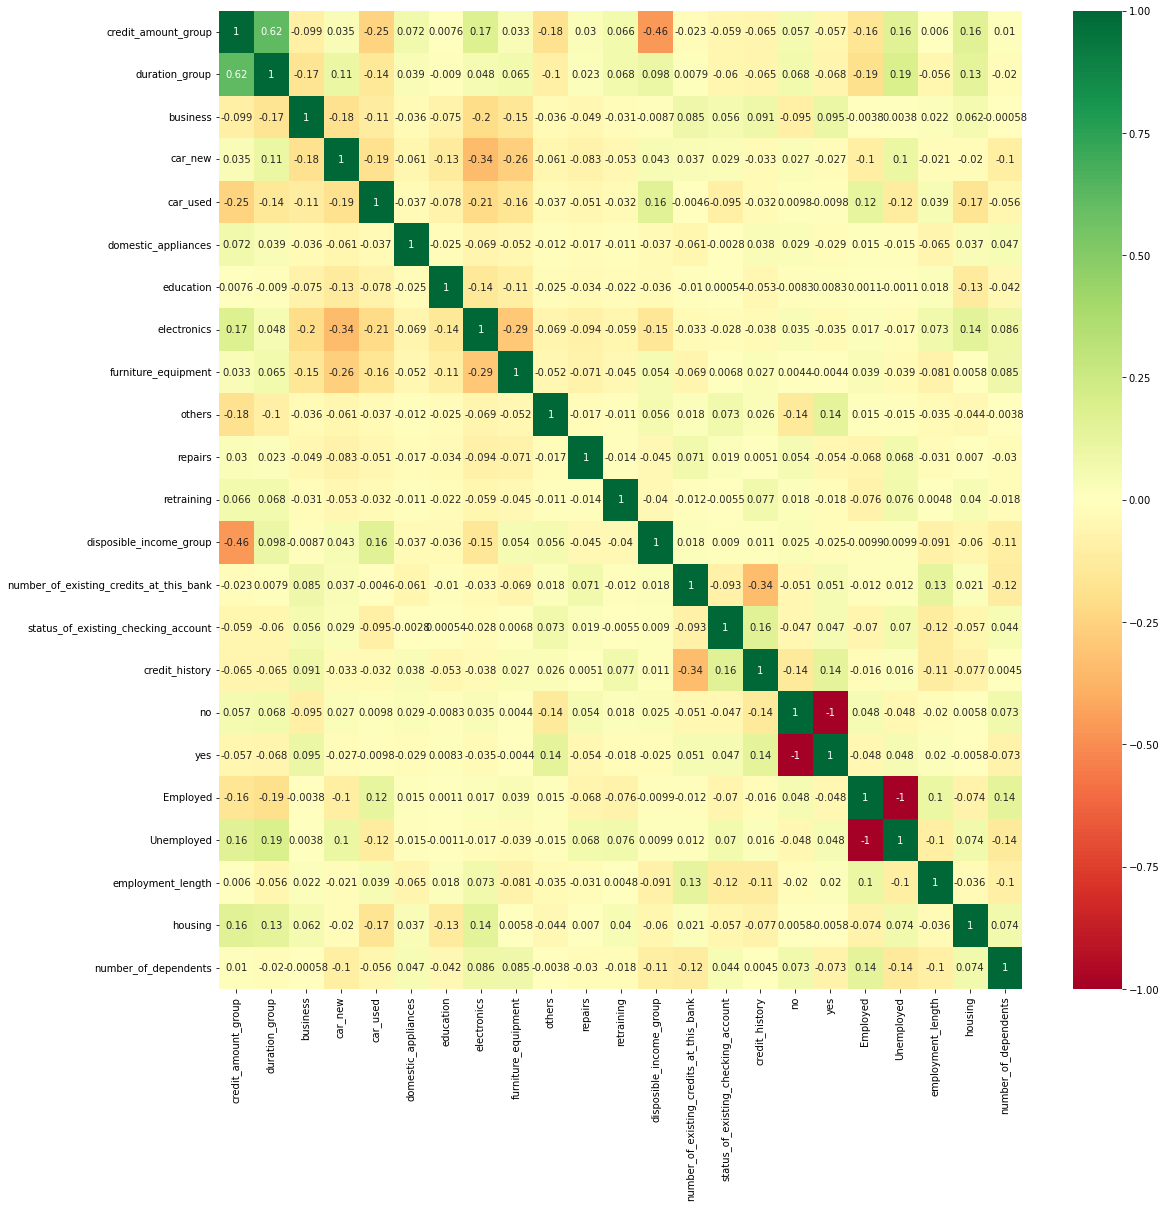

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [69]:
x.columns

Index(['credit_amount_group', 'duration_group', 'business', 'car_new',
       'car_used', 'domestic_appliances', 'education', 'electronics',
       'furniture_equipment', 'others', 'repairs', 'retraining',
       'disposible_income_group', 'number_of_existing_credits_at_this_bank',
       'status_of_existing_checking_account', 'credit_history', 'no', 'yes',
       'Employed', 'Unemployed', 'employment_length', 'housing',
       'number_of_dependents'],
      dtype='object')

In [70]:
x.drop(['Unemployed'], axis =1, inplace=True)
x.drop(['no'], axis =1, inplace=True)

In [73]:
x.columns


Index(['credit_amount_group', 'duration_group', 'business', 'car_new',
       'car_used', 'domestic_appliances', 'education', 'electronics',
       'furniture_equipment', 'others', 'repairs', 'retraining',
       'disposible_income_group', 'number_of_existing_credits_at_this_bank',
       'status_of_existing_checking_account', 'credit_history', 'yes',
       'Employed', 'employment_length', 'housing', 'number_of_dependents'],
      dtype='object')

# Train model

In [74]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=1)

# https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [75]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

C:\Users\griev\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [76]:
reg_rf.score(x_test, y_test)

0.9087392094705928

In [77]:
#from sklearn.ensemble import XGBRegressor
#import xgboost as xgb
from xgboost import XGBRegressor
xgbr = XGBRegressor(  learning_rate= 0.13242674454922954,
    max_depth= 24,
    max_leaves= 10,
    subsample= 0.8783082904441846,
    colsample_bytree= 0.8104855152582308,
    min_child_weight= 2,
    min_split_loss= 0.01761025238301419)

In [78]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8104855152582308, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.13242674454922954, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=24, max_leaves=10,
             min_child_weight=2, min_split_loss=0.01761025238301419,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=None, n_jobs=None, num_parallel_tree=None, ...)

In [79]:
y_pred_xg = xgbr.predict(x_test)

In [80]:
y_pred_xg

array([621.1548 , 618.0299 , 627.96893, 622.8665 , 617.4392 , 625.2279 ,
       622.67975, 624.49207, 627.91785, 630.0476 , 619.702  , 624.2613 ,
       624.5452 , 631.5082 , 626.299  , 624.67456, 629.4071 , 629.0182 ,
       626.6226 , 618.93005, 622.8907 , 622.97205, 628.3966 , 628.37305,
       629.91943, 627.25757, 621.4367 , 627.61505, 626.7299 , 612.5733 ,
       628.0319 , 627.16284, 619.98663, 624.70593, 625.7713 , 620.86163,
       623.94073, 617.6866 , 626.04065, 630.2421 , 623.8057 , 625.62006,
       630.1844 , 622.54156, 624.99915, 629.09625, 626.59106, 626.2433 ,
       630.8512 , 629.59174, 628.55804, 622.9257 , 622.556  , 624.41394,
       622.3069 , 629.2142 , 619.7597 , 622.124  , 630.2807 , 622.0391 ,
       622.3664 , 631.5355 , 620.00934, 631.7088 , 621.7296 , 624.3068 ,
       627.06146, 629.87335, 621.12805, 617.0225 , 628.5461 , 626.2522 ,
       631.2852 , 624.60236, 625.7907 , 627.33545, 617.60803, 627.1606 ,
       628.72925, 628.6647 , 624.3118 , 630.0012 , 

In [81]:
xgbr.score(x_test, y_test)

0.9766746294676769

# Test model

In [ ]:
#reg_rf.score(x_train, y_train)

# Evaluate the model

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming 'actual' and 'predicted' are your actual and predicted values
mse = mean_squared_error(y_test, y_pred_xg)
rmse = sqrt(mse)
print(rmse)

0.5893262569053568


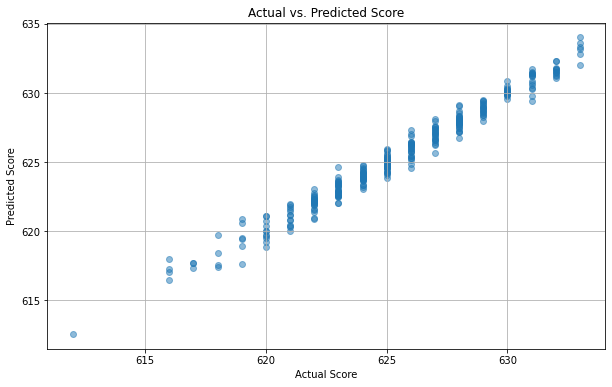

In [83]:
#https://appdividend.com/2023/10/07/root-mean-square-error-in-python-and-machine-learning/
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xg, alpha=0.5)

#plt.plot([0, max(y_test)], [0, max(y_pred_xg)], color='red') # 45-degree line
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Score')
plt.grid(True)
plt.show()

# Save model

In [84]:
import pickle
#https://www.youtube.com/watch?v=lrShBmW8Iqs
# install requirement.txt file - https://stackoverflow.com/questions/66899666/how-to-install-from-requirements-txt

In [99]:
x_train.columns

Index(['Credit_amount_group', 'duration_group', 'business', 'car_new',
       'car_used', 'domestic_appliances', 'education', 'furniture_equipment',
       'others', 'radio_television', 'repairs', 'retraining',
       'disposible_income_group', 'Occupation', 'Employment_length',
       'co_applicant', 'guarantor', 'none', 'for_free', 'own', 'rent',
       'More_than_4_years', 'one_year_or_less', 'three_years', 'two_years',
       'Age_group', 'Number_of_dependents'],
      dtype='object')

# RF Regressor

# XGBR

In [86]:
# file = open('xgboost.pkl','wb')
import pickle
file = open('creditscore_xgboost.pkl','wb')
#dump information to the file
pickle.dump(xgbr, file)
#load the saved model
model = open('creditscore_xgboost.pkl','rb')
loaded_pkl_model = pickle.load(model)